# Atelier 2 : Traitement de données Textuelles

#### Réalisé par : Ismail CHAKRANE / Rida ASRI

In [1]:
from functions import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\etulyon1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
file_name = "PubMed-multi-label-dataset.csv"
df = import_data(file_name)
df

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Five donors-one recipient: modeling a mosaic o...,BACKGROUND: A 21-year-old man was admitted to ...,"['Adult', 'Cell Transplantation', 'Cord Blood ...",18364724,"[['M01.060.116'], ['E02.095.147.500', 'E04.936...","['Named Groups [M]', 'Analytical, Diagnostic a...",1,1,1,0,1,0,1,0,0,0,0,1,0,0
49996,The role of eicosanoids in cyclosporine nephro...,Nephrotoxicity is the most troublesome complic...,"['Animals', 'Cyclosporins', 'In Vitro Techniqu...",2735953,"[['B01.050'], ['D04.345.566.235', 'D12.644.641...","['Organisms [B]', 'Chemicals and Drugs [D]', '...",1,1,0,1,1,0,0,0,0,0,0,0,0,0
49997,Impact of pancreaticoduodenal arcade dilation ...,BACKGROUND: The aim of this study was to inves...,"['Adult', 'Aged', 'Aged, 80 and over', 'Dilata...",28919282,"[['M01.060.116'], ['M01.060.116.100'], ['M01.0...","['Named Groups [M]', 'Diseases [C]', 'Anatomy ...",1,1,1,0,1,0,0,0,0,0,0,1,1,0
49998,Outcomes of Preterm Infants following Discussi...,OBJECTIVES: To describe the frequency of postn...,"['Decision Making', 'Female', 'Humans', 'Infan...",28647272,"[['F02.463.785.373'], ['B01.050.150.900.649.31...","['Psychiatry and Psychology [F]', 'Organisms [...",0,1,0,0,1,1,0,1,0,0,0,1,1,0


Types de colonnes :
Title           object
abstractText    object
meshMajor       object
pmid             int64
meshid          object
meshroot        object
A                int64
B                int64
C                int64
D                int64
E                int64
F                int64
G                int64
H                int64
I                int64
J                int64
L                int64
M                int64
N                int64
Z                int64
dtype: object
Nombre de lignes : 50000
Nombre de colonnes : 20
Fréquence des labels :
A    23263
B    46577
C    26453
D    31074
E    39202
F     8885
G    33609
H     6069
I     5595
J     5531
L     7503
M    21363
N    22919
Z     8049
dtype: int64


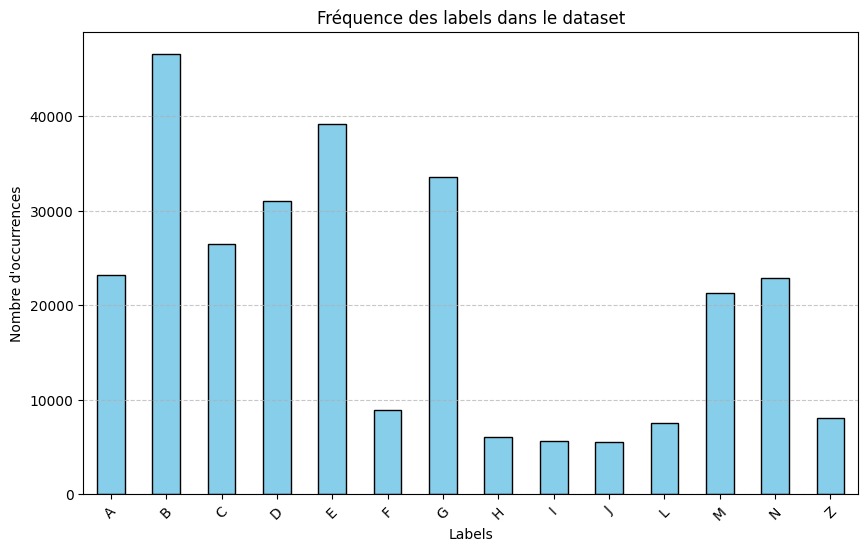

In [3]:
analyze_data(df)

## Modélisation

Dans notre modélisation, on a essayé d'utiliser la colonne abstracttext pour représenter notre corpus qu'on va utiliser dans l'entraînement de nos modèles. Avant l'entraînement, on a préparé notre texte. Ensuite, on fait un split avec des portions de 50% de train et test. Dans la partie de vérification à chaque, on utilisera la méthode appropriée pour créer notre base d'entraînement vectorisée. Dans la partie modèle, on essaie d'utiliser 3 chaînes avec le ClassifierChain et le MultiOutput avec chacune de nos modèles KNN et MLP. Pour les chaînes, on utilise le vote majoritaire entre les 3 pour décider de la prédiction finale et pour le modèle KNN, on utilisera un grid search pour trouver le meilleur K.

In [4]:
df = traiter_data(df)
df

,abstractText,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,fiftyfour paraffin embedded tissue section pat...,0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,present crosssectional study conducted determi...,0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,occurrence individual amino acid dipeptide fra...,1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,1980 lim sun introduced microcapsule coated al...,1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,substantially improved hydrogel particle based...,1,1,0,1,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,background 21yearold man admitted hospital leu...,1,1,1,0,1,0,1,0,0,0,0,1,0,0
49996,nephrotoxicity troublesome complication cyclos...,1,1,0,1,1,0,0,0,0,0,0,0,0,0
49997,background aim study investigate impact pancre...,1,1,1,0,1,0,0,0,0,0,0,1,1,0
49998,objective describe frequency postnatal discuss...,0,1,0,0,1,1,0,1,0,0,0,1,1,0


In [5]:
X_train, X_test, y_train, y_test = separer_data(df)
X_train

25858    laparoscopic cholecystectomy become standard c...
10784    report development atomic decomposition method...
24807    objective angelica archangelica linn widely us...
49534    proposed desensitization 5ht1a 5hydroxytryptam...
3345     background content published social medium imp...
                               ...                        
11284    mode action intraarticularly administered cort...
44732    author studied growth peculiarity ascitic hepa...
38158    introduction objective study evaluate initial ...
860      existence delayed inhibition secretion protein...
15795    pseudomonas aeruginosa bacterium frequently is...
Name: abstractText, Length: 25000, dtype: object

In [6]:
X_train_vectorised, X_test_vectorised, tfidf_vectorizer = vectorisation_tfidf(X_train, X_test)
X_train_vectorised.shape

(25000, 2000)

In [7]:
results = run_models(X_train_vectorised, y_train, X_test_vectorised, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.795696  0.624772        0.89516
KNN_MultiOutput      0.797945  0.628645        0.90000
NN_ClassifierChain   0.818773  0.704709        0.87316
NN_MultiOutput       0.814428  0.700177        0.88436


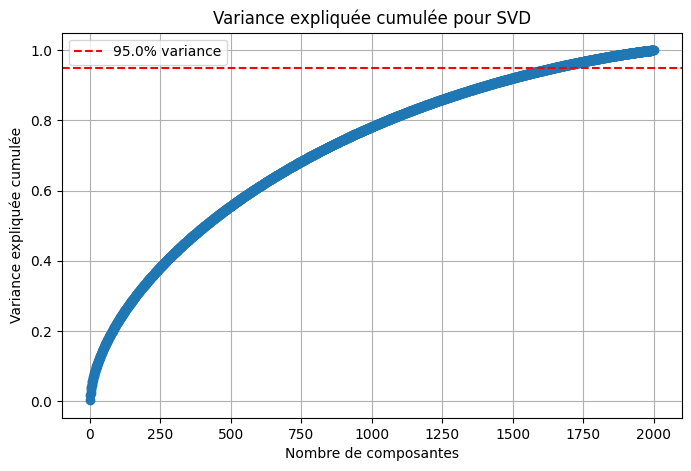

In [8]:
plot_svd_cumulative_variance(X_train_vectorised)

D'après la courbe, on a décidé de choisir 1000 embedding puisqu'elle couvre 80% de la variance de nos données initiales (2000 embedding)

In [9]:
X_train_vectorised_svd, X_test_vectorised_svd = apply_svd(X_train_vectorised, X_test_vectorised, tfidf_vectorizer, n_components=1000)

Top words for each concept:
Concept #0: patient cell group study protein treatment level effect gene expression
Concept #1: cell protein expression gene mouse activity human receptor binding line
Concept #2: cell patient tumor cancer expression survival case treatment carcinoma therapy
Concept #3: gene patient protein sequence mutation case expression dna analysis region
Concept #4: patient protein gene group acid rat expression sequence binding level
Concept #5: gene group expression level risk ci 95 cancer woman control
Concept #6: group cell gene method strain dna sequence two specie difference
Concept #7: cancer tumor case breast method lung carcinoma metastasis tissue woman
Concept #8: case mouse gene rat expression treatment lesion response brain report
Concept #9: group cancer tumor treatment breast expression health protein care receptor
Concept #10: case protein group child binding woman diagnosis year age report
Concept #11: strain activity treatment infection acid drug compo

In [10]:
X_train_vectorised_svd.shape

(25000, 1000)

In [11]:
results = run_models(X_train_vectorised_svd, y_train, X_test_vectorised_svd, y_test)

Nombre optimal de voisins pour KNN : 19
Entraînement de KNN avec ClassifierChain...
Entraînement de KNN avec MultiOutputClassifier...
Entraînement de NN avec ClassifierChain...
Entraînement de NN avec MultiOutputClassifier...

Comparaison des performances des modèles :
                     micro-F1  macro-F1  zero-one-loss
KNN_ClassifierChain  0.785994  0.607770        0.89916
KNN_MultiOutput      0.775694  0.594496        0.91436
NN_ClassifierChain   0.820502  0.706939        0.87288
NN_MultiOutput       0.813129  0.699674        0.88848


En termes de performance, on voit bien que la méthode TF-IDF sans SVD a eu de bons résultats sur presque les 3 modes KNN_ClassifierChain, KNN_MultiOutput, NN_MultiOutput. En termes de temps d'exécution, parce qu'on n'a pas utilisé toute la taille initiale des embedding (2000), on a gagné avec le SVD le temps d'exécution